Portfolio Part II
, Hawraa H A E Ali 
, up2290783

In [41]:
import pandas as pd
import numpy as np
import plotly.express as px #interactive charts
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [42]:
#Configure visual settings

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Exercise 1: Generate Random DataFrame

In [43]:
data = np.random.randn(6,4)
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D'], index=[f'Row{i}' for i in range(1,7)])
print(df.info())
print("Shape:", df.shape)
print("Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Row1 to Row6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0+ bytes
None
Shape: (6, 4)
Statistics:
               A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.371650 -0.035537 -0.235306 -0.329826
std    1.067280  1.575454  0.923316  0.972074
min   -1.408175 -2.423011 -0.981102 -1.611067
25%   -1.297303 -0.779403 -0.779621 -1.124035
50%   -0.508942 -0.075700 -0.486968  0.007750
75%    0.526862  1.136775 -0.216925  0.369760
max    0.884119  1.834227  1.547286  0.627481


Exercise 2: Boxplots of Iris dataset

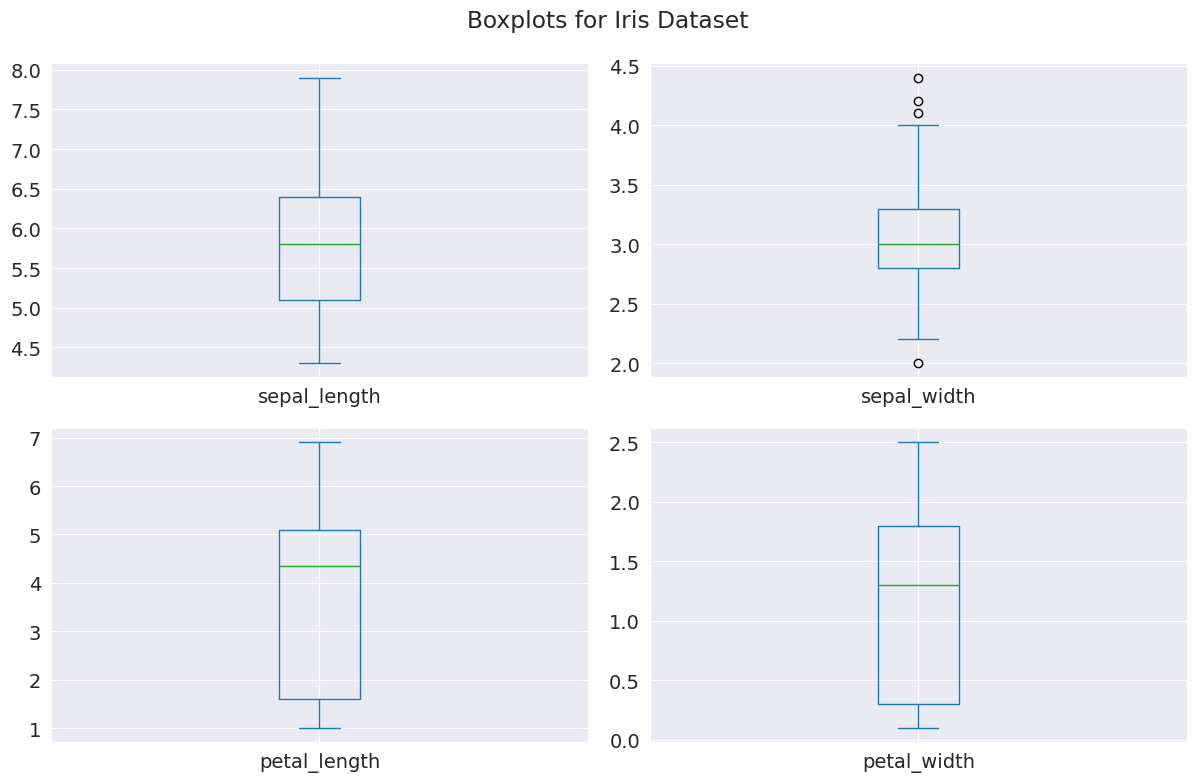

In [44]:
iris = sns.load_dataset('iris')
iris.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(2,2), title='Boxplots for Iris Dataset', figsize=(12,8))
plt.tight_layout()
plt.show()

Exercise 3: Sunburst chart using Tips dataset

In [45]:
tips = sns.load_dataset('tips')

tips['sex'] = tips['sex'].astype(str)
tips['day'] = tips['day'].astype(str)
tips['time'] = tips['time'].astype(str)

grouped = tips.groupby(['sex', 'day', 'time'], observed=True)['tip'].sum().reset_index()

fig = px.sunburst(
    data_frame=grouped,
    path=['sex', 'day', 'time'],
    values='tip',
    title='Tips by Sex, Day & Time'
)
fig.show()

Exercise 4: Simple Linear Regression

Column names in tips dataset: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
Predicted tip for a $50 bill: $6.17


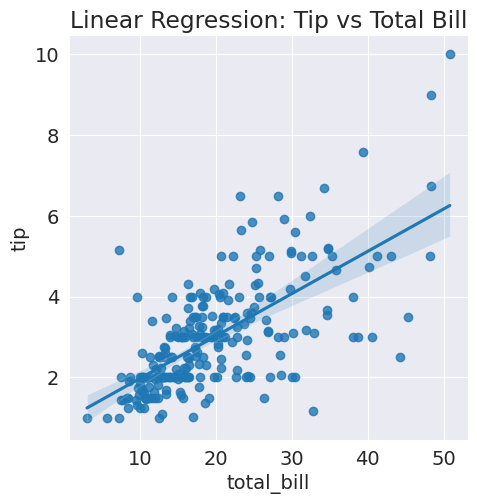

In [46]:
print("Column names in tips dataset:", tips.columns)
X = tips[['total_bill']]
y = tips['tip']
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(pd.DataFrame({'total_bill': [50]}))
print(f"Predicted tip for a $50 bill: ${predicted[0]:.2f}")

#Regression line visualization
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.title('Linear Regression: Tip vs Total Bill')
plt.show()

Exercise 5: Titanic Decision tree with One-Hot Encoding

Model Accuracy: 69.23%
Prediction for sample passenger: 1


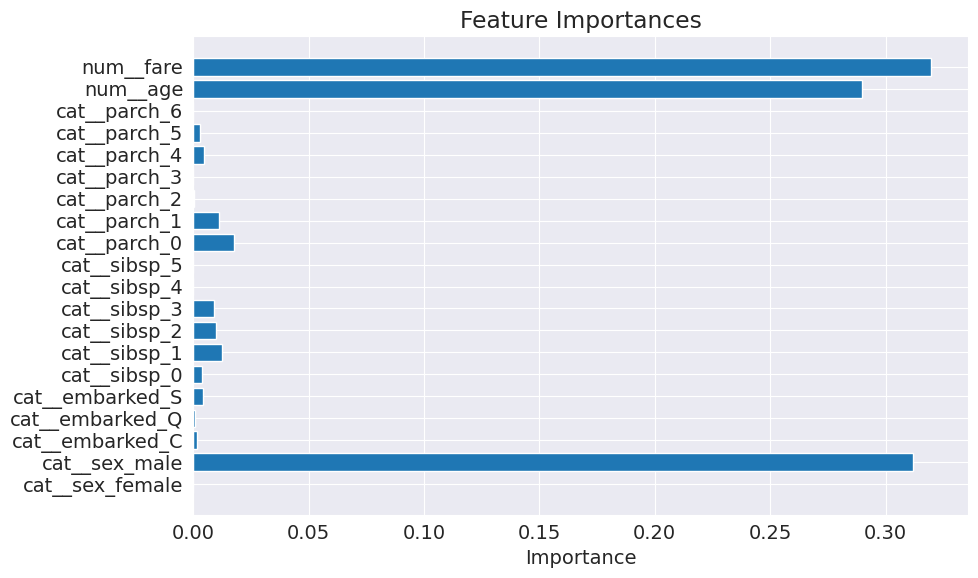

In [47]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'sex', 'age', 'fare', 'sibsp', 'parch', 'embarked']].dropna()
X = titanic.drop('survived', axis=1)
y = titanic['survived']

cat_features = ['sex', 'embarked', 'sibsp', 'parch']
num_features = ['age', 'fare']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_features),
    ('num', 'passthrough', num_features)
])

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

sample = pd.DataFrame([{
    'sex' : 'female', 'age': 29, 'fare': 72.5, 'sibsp': 1, 'parch': 1, 'embarked': 'S'
    }])
print("Prediction for sample passenger:", clf_pipeline.predict(sample)[0])

feature_names = clf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = clf_pipeline.named_steps['classifier'].feature_importances_
plt.barh(feature_names, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

The End :)